<a href="https://colab.research.google.com/github/NEOEQ/Controle-de-Processos/blob/main/Exerc%C3%ADcio_de_Aula_%5B4%5D_Primeira_Ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de Primeira Ordem

Considerando que o sistema de primeira ordem é representado pela seguinte equação diferencial ordinária: 

$$\tau\frac{dY(t)}{dt}+Y(t)=KX\left(t\right)$$

onde $\tau$ é a constante de tempo, $K$ é o ganho estático e $Y(0)=0$ e $X(0)=0$. 

A transformada de Laplace é escrita como:    

$$Y(s)=\left[\frac{K}{\tau s+1}\right]X(s)$$

Considerando que $\tau=5$ e $K=1.434$, obter a resposta do sistema de primeira ordem para uma entrada (i) degrau unitário, (ii) rampa e (iii) senoidal. 

### (i) Entrada Degrau 

Considerando uma entrada degrau do tipo $X(t)=ΔX$ $(X(s) = ΔX/s)$, a solução analítica é escrita pela equação:    

$$ Y(t)=K\Delta\ X\left(1-e^{-t/\tau}\right) $$

#### Importação das bibliotecas 

In [2]:
%matplotlib inline              
import matplotlib.pyplot as plt # bilioteca gráfica
import numpy as np # pacote matemático numpy
from scipy.integrate import odeint # pacote para integração numérica

#### Definição dos parâmetros

Especificar os valores de todos os parâmetros do modelo.  Usar comentários para descrever os parâmetros.

In [3]:
tal  = 5.0     # Constante de tempo
K   = 1.434     # Ganho de estado estacionário
deltaX = 1.0 # degrau unitário
Y_s = 0.0 # estado estacionário de Y

#### Escrever as funções 

In [4]:
# Função que representa a entrada
def X(t):
    return deltaX # valor da entrada ao longo do tempo

# Equação diferencial não linear (linearizada em termos do desvio)
def model(Y,t):
    return (K*X(t)-Y) / tal   # dY/dt = ( K*X - Y ) / tal (passei tudo para o lado direito)

# Equação da solução analítica
def analitico(Y,t):
    return K*deltaX*(1-np.exp(-t/tal) )  # np.exp (exponencial)

#### Escolher a condição inicial, intervalo de amostragem e integrar a equação diferencial



In [9]:
IC = [Y_s] # condicao inicial (0)
t = np.linspace(0,40,100) # 0 até 40 minutos (usando 40 pontos)
Y = odeint(model,IC,t) # integrando a EDO (valor inicial) para obter solução numérica
Y_a = analitico(Y,t) # solucão analítica
xt = np.zeros(100)
xt[1:100] = deltaX


#### Visualizar e analisar os resultados

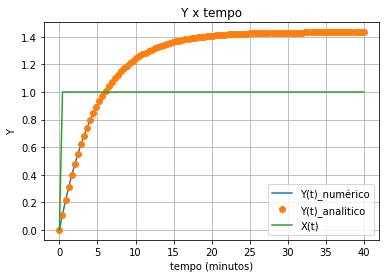

In [10]:
plt.plot(t,Y,t,Y_a,'o',t,xt)

plt.xlabel('tempo (minutos)')
plt.ylabel('Y')
plt.title('Y x tempo')
plt.legend(['Y(t)_numérico','Y(t)_analitico','X(t)']);
plt.grid()

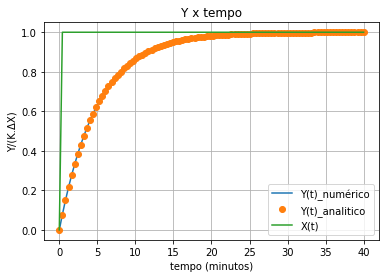

In [11]:
plt.plot(t,Y/(K*deltaX),t,Y_a/(K*deltaX),'o',t,xt)

plt.xlabel('tempo (minutos)')
plt.ylabel('Y/(K.ΔX)')
plt.title('Y x tempo')
plt.legend(['Y(t)_numérico','Y(t)_analitico','X(t)']);
plt.grid()

### (ii) Entrada Rampa 

Considerando uma entrada rampa do tipo $X(t)=r\cdot t$ $(X(s) = r/s^{2})$, a solução analítica é escrita pela equação:    

$$ Y(t)=Kr\tau e^{-t/\tau}+Kr(t-\tau)u(t) $$

#### Definição dos parâmetros

Especificar os valores de todos os parâmetros do modelo.  Usar comentários para descrever os parâmetros.

In [ ]:
tal  = 5.0     # Constante de tempo
K   = 1.434     # Ganho de estado estacionário
r = 1.0 # coeficiente da rampa
Y_s = 0.0 # Estado estacionário

#### Escrever as funções 

In [ ]:
# Função que representa a entrada
def X(t):
    return r*t # valor da entrada ao longo do tempo

def u(t): # Função degrau 
    return 1.0 # valor da entrada ao longo do tempo

# Equação diferencial não linear (linearizada em termos do desvio)
def model(Y,t):
    return (K*X(t)-Y) / tal

# Equação da solução analítica
def analitico(Y,t):
    return K*r*tal*(np.exp(-t/tal) ) + K*r*(t-tal)*u(t)

#### Escolher a condição inicial, intervalo de amostragem e integrar a equação diferencial



In [ ]:
IC = [Y_s] # condicao inicial
t = np.linspace(0,40,40) # 0 até 40 minutos (usando 40 pontos)
Y = odeint(model,IC,t) # integrando a EDO (valor inicial) para obter solução numérica
Y_a = analitico(Y,t) # solucão analítica
xt = np.zeros(40)
xt[0:40] = r*t # Rampa

#### Visualizar e analisar os resultados

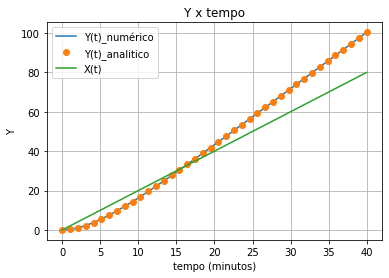

In [ ]:
plt.plot(t,Y,t,Y_a,'o',t,xt)

plt.xlabel('tempo (minutos)')
plt.ylabel('Y')
plt.title('Y x tempo')
plt.legend(['Y(t)_numérico','Y(t)_analitico','X(t)']);
plt.grid()

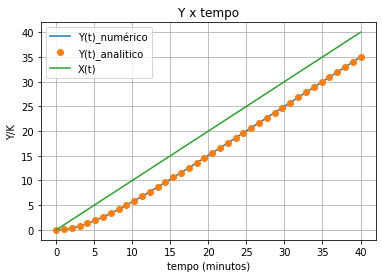

In [ ]:
plt.plot(t,Y/K,t,Y_a/K,'o',t,xt)

plt.xlabel('tempo (minutos)')
plt.ylabel('Y/K')
plt.title('Y x tempo')
plt.legend(['Y(t)_numérico','Y(t)_analitico','X(t)']);
plt.grid()

### (iii) Entrada Senoidal 

Considerando uma entrada senoidal do tipo $X(t)=A\cdot sen(ωt)$, a solução analítica é escrita pela equação:    

$$ Y(t)=\frac{KA\omega\tau}{1+\tau^2\omega^2}e^{-t/\tau}+\frac{KA}{\sqrt{1+\tau^2\omega^2}}sen\left(\omega t+\theta\right) $$

#### Definição dos parâmetros

Especificar os valores de todos os parâmetros do modelo.  Usar comentários para descrever os parâmetros.

In [ ]:
tal  = 0.5     # Constante de tempo
K   = 0.3     # Ganho de estado estacionário
Y_s = 0.0 # Estado estacionário (variável desvio)
omega = 0.5 # valor do ômega
A = 1

#### Escrever as funções 

In [ ]:
# Função que representa a entrada
def X(t):
    return A*np.sin(omega*t) # valor da entrada (senoidal) ao longo do tempo

def u(t): # Função degrau 
    return 1.0 # valor da entrada ao longo do tempo

# Equação diferencial não linear (linearizada em termos do desvio)
def model(Y,t):
    return (K*X(t)-Y) / tal

# Equação da solução analítica
def analitico(Y,t):
  teta = np.arctan(-omega*tal)
  return ( (K*A*tal*omega) / (1+(tal**2)*(omega**2)) )*np.exp(-t/tal) + K*A*np.sin(omega*t + teta) / (np.sqrt( (1+(tal**2)*(omega**2)) ) )

#### Escolher a condição inicial, intervalo de amostragem e integrar a equação diferencial

In [ ]:
IC = [Y_s] # condicao inicial
t = np.linspace(0,40,100) # 0 até 40 minutos (usando 40 pontos)
Y = odeint(model,IC,t) # integrando a EDO (valor inicial) para obter solução numérica
Y_a = analitico(Y,t) # solucão analítica
xt = np.zeros(100)
xt[0:100] = A*np.sin(omega*t) # Rampa

#### Visualizar e analisar os resultados

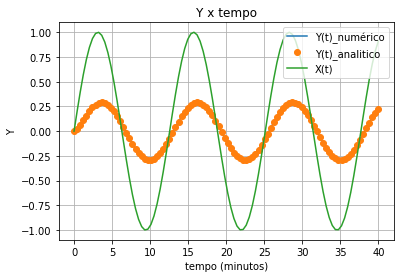

In [ ]:
plt.plot(t,Y,t,Y_a,'o',t,xt)

plt.xlabel('tempo (minutos)')
plt.ylabel('Y')
plt.title('Y x tempo')
plt.legend(['Y(t)_numérico','Y(t)_analitico','X(t)']);
plt.grid()